In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline

In [2]:
train_data = pd.read_csv('zhengqi_train.txt',sep='\t')
test_data = pd.read_csv('zhengqi_test.txt',sep='\t')

In [3]:
train_data.head

<bound method NDFrame.head of          V0     V1     V2     V3     V4     V5     V6     V7     V8     V9  \
0     0.566  0.016 -0.143  0.407  0.452 -0.901 -1.812 -2.360 -0.436 -2.114   
1     0.968  0.437  0.066  0.566  0.194 -0.893 -1.566 -2.360  0.332 -2.114   
2     1.013  0.568  0.235  0.370  0.112 -0.797 -1.367 -2.360  0.396 -2.114   
3     0.733  0.368  0.283  0.165  0.599 -0.679 -1.200 -2.086  0.403 -2.114   
4     0.684  0.638  0.260  0.209  0.337 -0.454 -1.073 -2.086  0.314 -2.114   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
2883  0.190 -0.025 -0.138  0.161  0.600 -0.212  0.757  0.584 -0.026  0.904   
2884  0.507  0.557  0.296  0.183  0.530 -0.237  0.749  0.584  0.537  0.904   
2885 -0.394 -0.721 -0.485  0.084  0.136  0.034  0.655  0.614 -0.818  0.904   
2886 -0.219 -0.282 -0.344 -0.049  0.449 -0.140  0.560  0.583 -0.596  0.904   
2887  0.368  0.380 -0.225 -0.049  0.379  0.092  0.550  0.551  0.244  0.904   

      ...    V29    V30    V31   

In [4]:
train_data_columns = train_data.columns

In [5]:
train_data_columns

Index(['V0', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30',
       'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'target'],
      dtype='object')

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2888 entries, 0 to 2887
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      2888 non-null   float64
 1   V1      2888 non-null   float64
 2   V2      2888 non-null   float64
 3   V3      2888 non-null   float64
 4   V4      2888 non-null   float64
 5   V5      2888 non-null   float64
 6   V6      2888 non-null   float64
 7   V7      2888 non-null   float64
 8   V8      2888 non-null   float64
 9   V9      2888 non-null   float64
 10  V10     2888 non-null   float64
 11  V11     2888 non-null   float64
 12  V12     2888 non-null   float64
 13  V13     2888 non-null   float64
 14  V14     2888 non-null   float64
 15  V15     2888 non-null   float64
 16  V16     2888 non-null   float64
 17  V17     2888 non-null   float64
 18  V18     2888 non-null   float64
 19  V19     2888 non-null   float64
 20  V20     2888 non-null   float64
 21  V21     2888 non-null   float64
 22  

In [7]:
corf = train_data[train_data.columns].corr()
corf

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
V0,1.000000,0.908607,0.463643,0.409576,0.781212,-0.327028,0.189267,0.141294,0.794013,0.077888,...,0.302145,0.156968,0.675003,0.050951,0.056439,-0.019342,0.138933,0.231417,-0.494076,0.873212
V1,0.908607,1.000000,0.506514,0.383924,0.657790,-0.227289,0.276805,0.205023,0.874650,0.138849,...,0.147096,0.175997,0.769745,0.085604,0.035129,-0.029115,0.146329,0.235299,-0.494043,0.871846
V2,0.463643,0.506514,1.000000,0.410148,0.057697,-0.322417,0.615938,0.477114,0.703431,0.047874,...,-0.275764,0.175943,0.653764,0.033942,0.050309,-0.025620,0.043648,0.316462,-0.734956,0.638878
V3,0.409576,0.383924,0.410148,1.000000,0.315046,-0.206307,0.233896,0.197836,0.411946,-0.063717,...,0.117610,0.043966,0.421954,-0.092423,-0.007159,-0.031898,0.080034,0.324475,-0.229613,0.512074
V4,0.781212,0.657790,0.057697,0.315046,1.000000,-0.233959,-0.117529,-0.052370,0.449542,-0.031816,...,0.659093,0.022807,0.447016,-0.026186,0.062367,0.028659,0.100010,0.113609,-0.031054,0.603984
V5,-0.327028,-0.227289,-0.322417,-0.206307,-0.233959,1.000000,-0.028995,0.081069,-0.182281,0.038810,...,-0.175836,-0.074214,-0.121290,-0.061886,-0.132727,-0.105801,-0.075191,0.026596,0.404799,-0.314676
V6,0.189267,0.276805,0.615938,0.233896,-0.117529,-0.028995,1.000000,0.917502,0.468233,0.450096,...,-0.467980,0.188907,0.546535,0.144550,0.054210,-0.002914,0.044992,0.433804,-0.404817,0.370037
V7,0.141294,0.205023,0.477114,0.197836,-0.052370,0.081069,0.917502,1.000000,0.389987,0.446611,...,-0.311363,0.170113,0.475254,0.122707,0.034508,-0.019103,0.111166,0.340479,-0.292285,0.287815
V8,0.794013,0.874650,0.703431,0.411946,0.449542,-0.182281,0.468233,0.389987,1.000000,0.100672,...,-0.011091,0.150258,0.878072,0.038430,0.026843,-0.036297,0.179167,0.326586,-0.553121,0.831904
V9,0.077888,0.138849,0.047874,-0.063717,-0.031816,0.038810,0.450096,0.446611,0.100672,1.000000,...,-0.221623,0.293026,0.121712,0.289891,0.115655,0.094856,0.141703,0.129542,-0.112503,0.139704


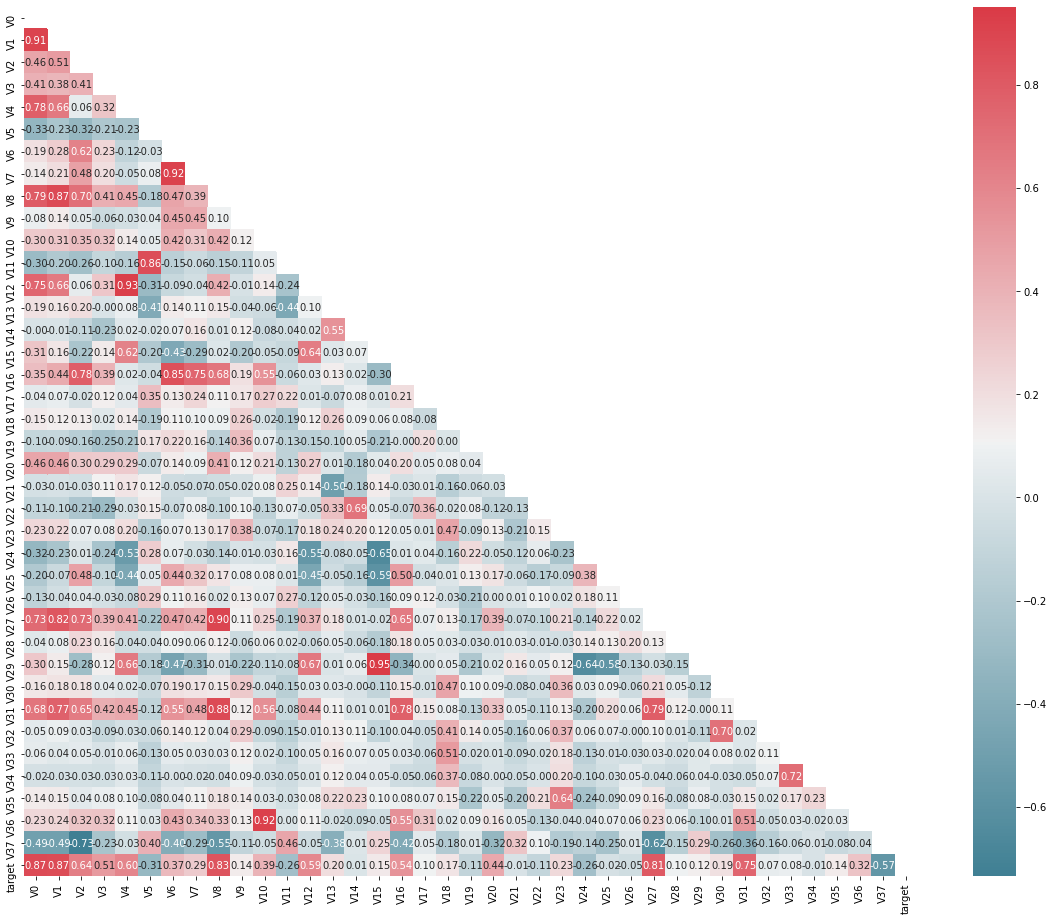

In [8]:
plt.figure(figsize=(20,16))
mask = np.zeros_like(corf)
mask[np.triu_indices_from(mask)]=True
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corf,cmap = cmap,mask=mask,annot=True,square = False,fmt='0.2f')
plt.show()

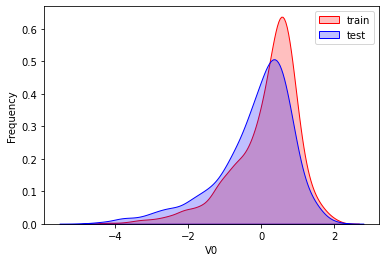

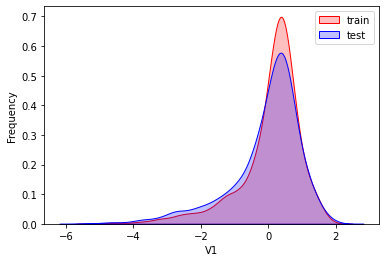

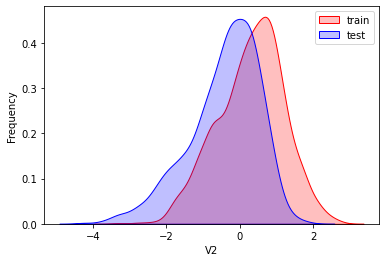

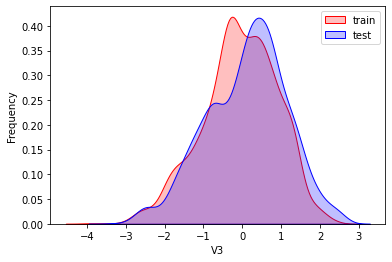

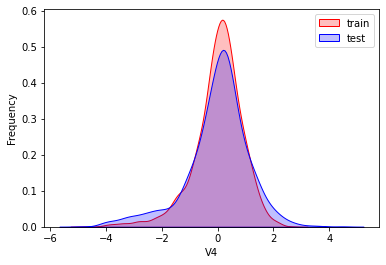

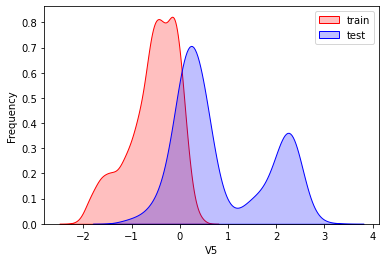

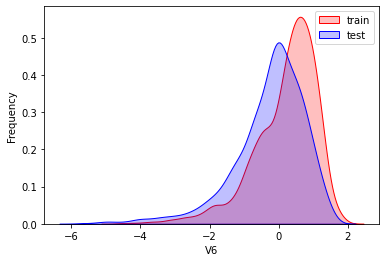

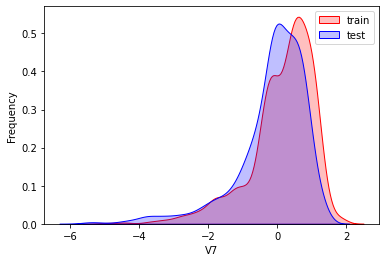

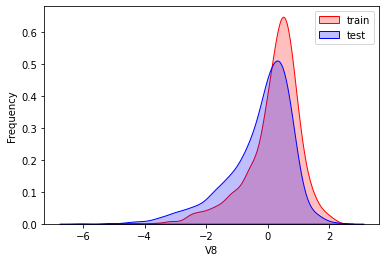

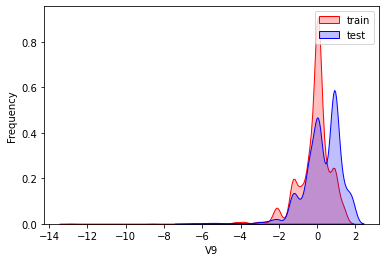

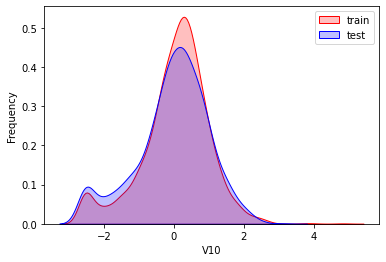

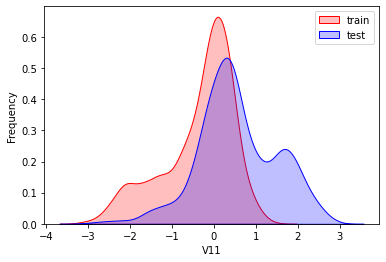

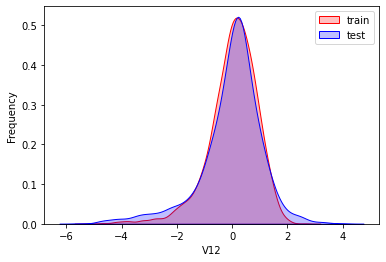

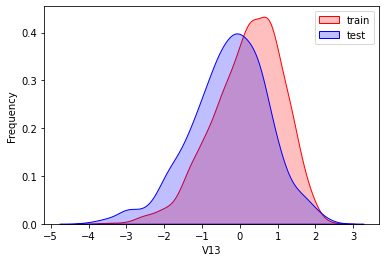

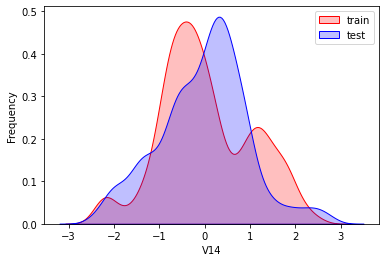

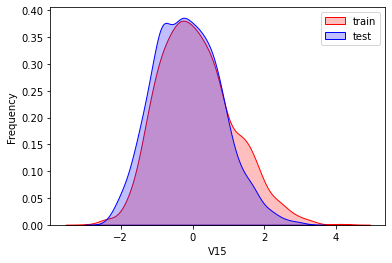

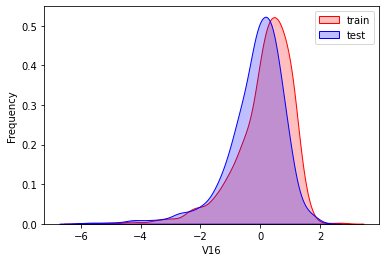

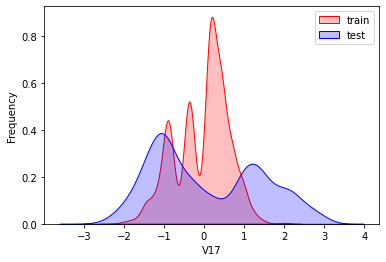

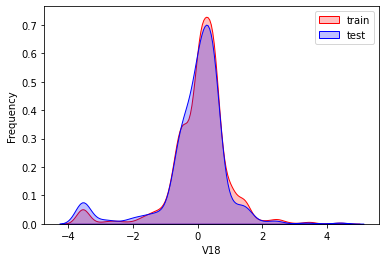

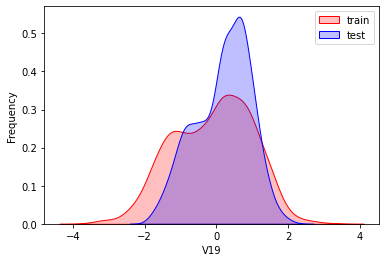

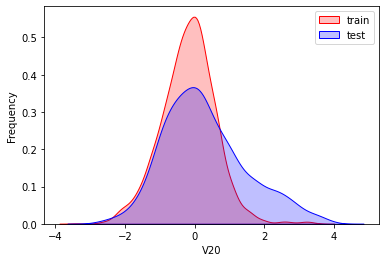

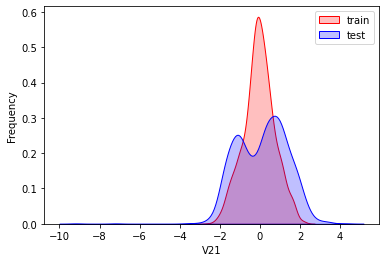

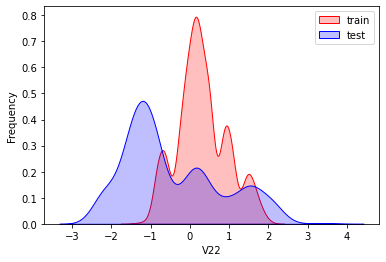

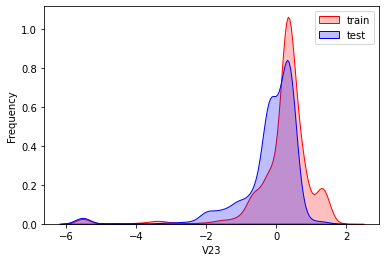

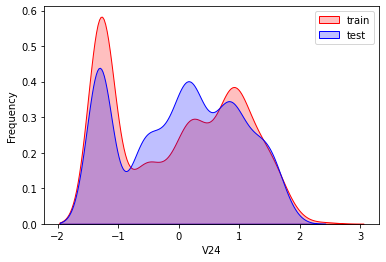

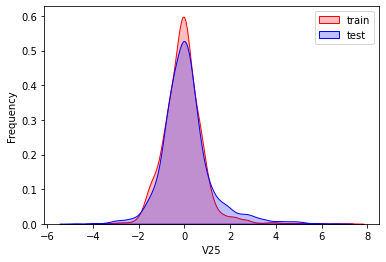

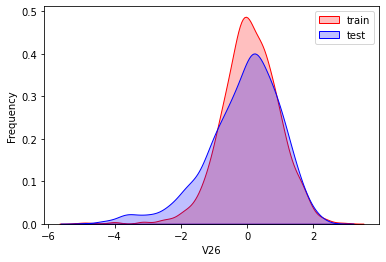

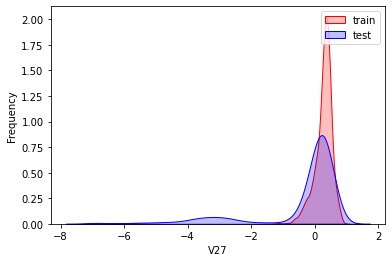

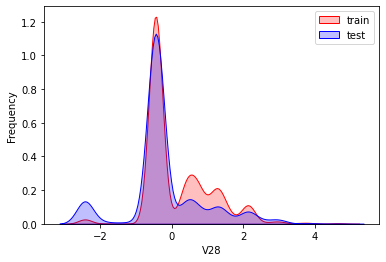

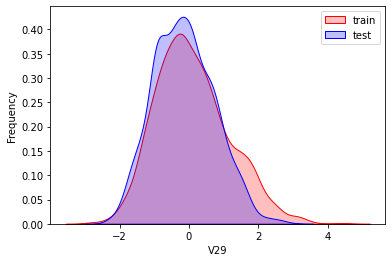

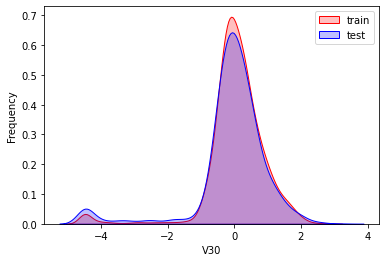

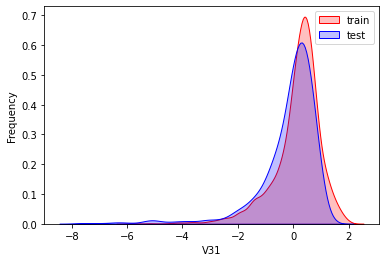

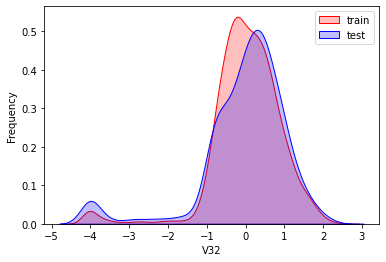

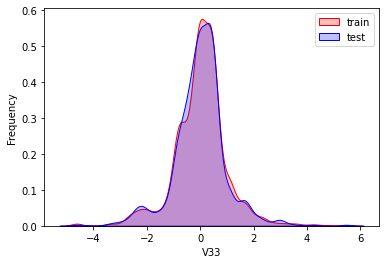

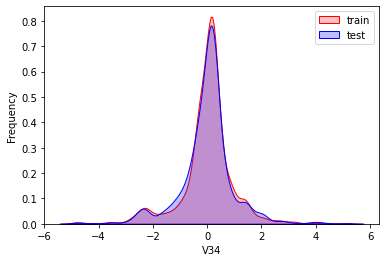

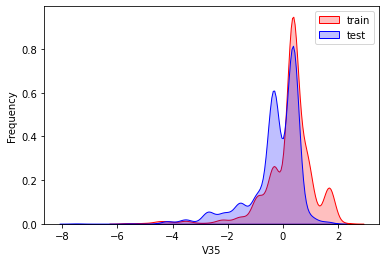

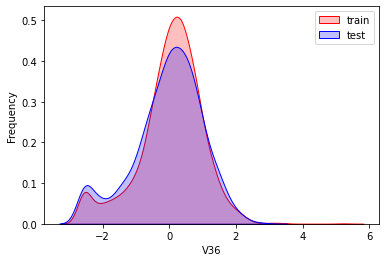

In [9]:
for column in train_data.columns[0:-2]:
    g = sns.kdeplot(train_data[column],color = 'Red', shade = True)
    g = sns.kdeplot(test_data[column],color = 'Blue',shade = True)
    g.set_xlabel(column)
    g.set_ylabel("Frequency")
    g = g.legend(["train","test"])
    plt.show()

In [10]:
extact_columns = [col for col in train_data.columns if col not in ['V5','V9','V11','V17','V21','V22','V35','target']]

In [11]:
X_data = train_data[extact_columns]
Y_data = train_data['target']
X_test = test_data[extact_columns]

In [12]:
svr_model = svm.SVR()

In [13]:
svr_model.fit(X_data,Y_data)

SVR()

In [14]:
Y_test = svr_model.predict(X_test)

In [15]:
Y_test

array([ 0.38303447,  0.34671224,  0.01708383, ..., -1.3041314 ,
       -1.60390669, -1.53985543])

In [16]:
Y_test = pd.DataFrame(Y_test)

In [17]:
Y_test

,0
0,0.383034
1,0.346712
2,0.017084
3,0.227241
4,0.380371
...,...
1920,-0.972707
1921,-1.242042
1922,-1.304131
1923,-1.603907


In [18]:
Y_test.to_csv('submit.txt',header = None,index = False)